# DATSCIW261 ASSIGNMENT #6

MIDS UC Berkeley, Machine Learning at Scale  
DATSCIW261 ASSIGNMENT #6  
[Natarajan Krishnaswami](mailto:natarajan@krishnaswami.org)

In [2]:
import IPython.display as di
di.display_html('''<button onclick='MathJax.Hub.Queue(["resetEquationNumbers",MathJax.InputJax.TeX]'>
Reset Equation Numbers
</button>''', raw=True)

Reset Equation Numbers

# SPECIAL INSTURCTIONS

This weeks homework is a group exercise. Your team assignments for completing this HW are located at:  
https://docs.google.com/spreadsheets/d/1ncFQl5Tovn-16slD8mYjP_nzMTPSfiGeLLzW8v_sMjg/edit?usp=sharing  
See column Team assignment for Homeworks in tab "Teams for HW Assignments"  
Please submit your homeworks (one per team) going forward via this form (and not thru the ISVC):  
https://docs.google.com/forms/d/1ZOr9RnIe_A06AcZDB6K1mJN4vrLeSmS2PD6Xm3eOiis/viewform?usp=send_form  
Please follow the instructions for submissions carefully.  
Note that all referenced files life in the enclosing directory.

## Week 6 ASSIGNMENTS

### HW6.0
1. In mathematics, computer science, economics, or management science what is mathematical optimization?  
*Answer*: Optimization is finding arguments (decision variable) that minimize or maximize some objective function, potentially under specified constraints.
2. Give an example of a optimization problem that you have worked with directly or that your organization has worked on.  
*Answer*:
3. Please describe the objective function and the decision variables.  
*Answer*:
4. Was the project successful (deployed in the real world)?  
*Answer*:
5. Describe.  
*Answer*:

# HW6.1
Optimization theory: 

1. For unconstrained univariate optimization
  1. what are the first order Necessary Conditions for Optimality (FOC)?
  2. What are the second order optimality conditions (SOC)? Give a mathematical defintion.
  3. Also in python, plot the univartiate function $x^3 -12x^2-6$ defined over the real domain $[-6,6]$
  4. Also plot its corresponding first and second derivative functions.
  5. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums.
  6. Highlight and label these points in your graphs.
  7. Justify your responses using the FOC and SOC.
2. For unconstrained multi-variate optimization
  1. what are the first order Necessary Conditions for Optimality (FOC)?
  2. What are the second order optimality conditions (SOC)? Give a mathematical defintion.
  3. What is the Hessian matrix in this context?

*Answers*
6.1-1 A-B:  
Given an optimization problem to find $\mathbf{x}\!\in\!\mathbb{R}$ minimizing $\,f\!:\!\mathbb{R}\!\to\!\mathbb{R}$, necessary criteria for a solution are:
  \begin{align}
     \frac{df}{dx}(x) & = 0 \\
     \frac{d^f}{dx^2}(x) & \geq 0
   \end{align}
For maximization, the second constraint changes from positive semidefiniteness to negative semidefiniteness:
  \begin{equation}
      \frac{d^f}{dx^2}(x) \leq 0
  \end{equation}

6.1-1 C-H
Coefs(f): [  1 -12   0  -6]


/opt/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


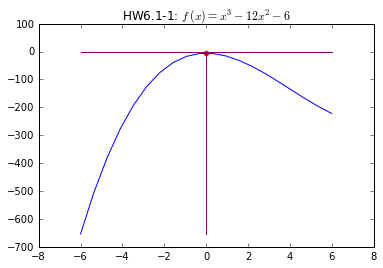

There appears to be a maximum at x=0, y=-6

Coefs(f'): [  1 -12   0  -6]


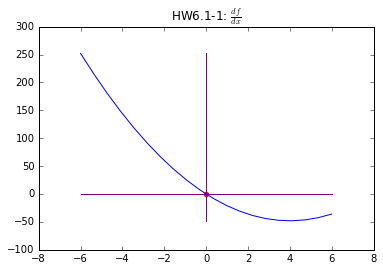

The derivative at x=0 is y'=0, confirming that this is an optimum (FOC)

Coefs(f'): [  1 -12   0  -6]


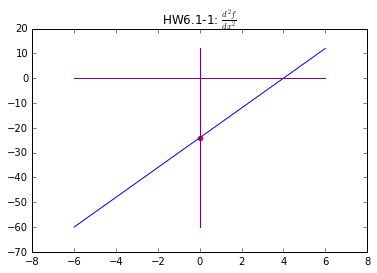

The second derivative at x=0 is y''=-24, confirming that this is a maximum (SOC)


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

print "6.1-1 C-H"

x=np.linspace(-6,6,20)
# We can write this as an expression in the third order subset of P(x)
basis=np.array([x**3,x**2,x,np.ones_like(x)])
coefs=np.array([1,-12,0,-6])
# to let us differentiate algebraically
def D(coefs):
    d=np.diag(range(len([1,0,1,2])-1,0,-1),-1)
    return d.dot(coefs)

def doPlot(title, name, x, vals, mark):
    print "Coefs("+name+"):", coefs
    x_min, x_max=x.min(),x.max()
    y_min, y_max=vals.min(),vals.max()
    plt.plot([x_min, x_max],[0,0], linestyle='-', linewidth=1, color='purple')
    plt.plot([0,0], [y_min, y_max], linestyle='-', linewidth=1, color='purple')
    plt.plot(x, vals)
    plt.title(title)
    plt.scatter([mark[0]],[mark[1]],color='red', marker='o')
    plt.show()
doPlot("HW6.1-1: $f\,(x)=x^3-12x^2-6$", 'f', x, coefs.dot(basis), [0,-6])
print "There appears to be a maximum at x=0, y=-6\n"

doPlot('HW6.1-1: $\\frac{df}{dx}$', "f'", x, D(coefs).dot(basis), [0,0])
print "The derivative at x=0 is y'=0, confirming that this is an optimum (FOC)\n"

doPlot('HW6.1-1: $\\frac{d^2f}{dx^2}$', "f'", x, D(D(coefs)).dot(basis), [0,-24])
print "The second derivative at x=0 is y''=-24, confirming that this is a maximum (SOC)"

6.1-2 A-B:  
Given an optimization problem to find $\mathbf{x}\!\in\!\mathbb{R}^n$ minimizing $\,f\!:\!\mathbb{R}^n\!\to\!\mathbb{R}$, necessary criteria for a solution are:
  \begin{align}
     \mathbf{\nabla}f(\mathbf{x}) & = \mathbf{0} \\
     \mathbf{y}^T \mathbf{H}f(\mathbf{x})\,\mathbf{y} & \geq 0, \forall \mathbf{y}\in\mathbb{R}^n
   \end{align}
For maximization, the second constraint changes from positive semidefiniteness to negative semidefiniteness:
$$\mathbf{y}^T \mathbf{H}f(\mathbf{x})\,\mathbf{y} \leq 0, \forall \mathbf{y}\in\mathbb{R}^n$$

6.1-2 C:  
The Hessian of $f$ &mdash; denoted $\mathbf{H}(f)$ above &mdash; is the matrix of second partial derivatives of $f$ with respect to each pair of $x_i$, $x_j$ (i.e., mixed second partials; $\nabla\!\otimes\!\nabla$)

### HW6.2
Taking $x=1$ as the first approximation($x_{t_1}$) of a root of $x^3 + 2x -4 = 0$, use the Newton-Raphson method to calculate the second approximation (denoted as $x_{t_2}$) of this root. (Hint the solution is $x_{t_2}=1.2$)

In [103]:
def f(coefs, x):
    basis=np.array([x**i for i in range(len(coefs))], dtype=float)
    return coefs.dot(basis.T)
def nrstep(coefs, x):
    return x-f(coefs,x)/f(D(coefs), x)

nrstep(np.array([1,0,2,-4]), 1)

1.200

### HW6.3
Convex optimization:

1. What makes an optimization problem convex?
2. What are the first order  Necessary Conditions for Optimality in convex optimization?
3. What are the second order optimality conditions for convex optimization?
4. Are both necessary to determine the maximum or minimum of candidate optimal solutions?

Fill in the BLANKS here:

> Convex minimization, a subfield of optimization, studies the problem of minimizing <u>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</u> functions over <u>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</u> sets. The <u>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</u> property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.

*Answer*  
1. An optimization problem is convex iff
  1. its objective function is a convex function
  2. its inequality constraints are convex sets
  3. its equality constraints are affine sets
2. FOC:  
$$f(\mathbf{x_1}) \geq f(\mathbf{x_0})+\nabla f(\mathbf{x_1})^T\cdot(\mathbf{x_1}-\mathbf{x_0})$$
3. SOC:  
$$\mathbf{H}(f) \succeq 0$$
4. No: convex functions do not have maxima or saddle points (the maximal direction would fail to be convex), so any optima are global minima.

> Convex minimization, a subfield of optimization, studies the problem of minimizing **objective** functions over **feasible** sets. The **convexity** property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.

### HW 6.4
The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:

$$f(\mathbf{weight}, \mathbf{W}, \mathbf{X}, \mathbf{y}) = 0.5 \sum_i weight_i \cdot (W_i X_i - y_i)^2$$

where training set consists of input variables $X$ ( in vector form) and a target variable $y$, and $W$ is the vector of coefficients for the linear regression model.

Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.

*Answer*:  
Since there are no cross-terms in $W_i$, each element of the summation will contribute to exactly one partial derivative:
\begin{align}
\frac{\partial f}{\partial W_i} & = 0.5 \, weight_i\frac{\partial\left((W_i X_i-y_i)^2\right)}{\partial W_i} \\
  & = 0.5\, weight_i
\frac{\partial\left((W_i X_i-y_i)^2\right)}{\partial (W_i X_i-y_i)}
\frac{\partial (W_i X_i-y_i)}{\partial W_i} \mbox{by the chain rule,} \\
 & = 0.5\,weight_i \, 2\, (W_i X_i-y_i))\,X_i \\
 & = weight_i\,X_i\,(W_i\, X_i-\, y_i) 
\end{align}
If we were to estimate $\mathbf{weight}$ rather than choosing it to normalize error variances, we would also want partials relative to its components, which are each linear:
$$\frac{\partial f}{\partial weight_i} = 0.5 \, (W_i X_i-y_i)^2$$

### HW 6.5
1. Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent.
2. Generate one million datapoints just like in the following notebook:  http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb
3. Weight each example as follows:
   $$weight(x)= \mathrm{abs}\left(\frac{1}{x}\right)$$
4. Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
5. Plot the resulting weighted linear regression model versus the original model that you used to generate the data. Comment on your findings.

In [285]:
%%writefile hw65.py
#!/opt/anaconda/bin/python

from mrjob.job import MRJob
from mrjob.step import MRStep
import numpy as np
import os.path
import sys

class LRJob(MRJob):
    def __init__(self,*args, **kwargs):
        sys.stderr.close()
        super(LRJob, self).__init__(*args, **kwargs)
        self.alpha=0.1
        self.partial_gradient=np.asarray([0.0,0.0])
        self.count=0
        with open('theta.csv') as w:
            for line in w:
                vals=line.strip().split(',')
                self.theta=np.array([float(vals[0]), float(vals[1])])

    def _df(self, y, x):
        w=1/(np.abs(x)+0.001)
        X=np.array([x, 1])
        y_hat=self.theta.dot(X)
        return w*(y-y_hat)*X
    def calc_partial_gradient(self, _, line):
        y,x=[float(num) for num in line.strip().split(',')]
        self.partial_gradient+=self._df(y, x)
        self.count+=1
    def emit_partial_gradient(self):
        yield None, [self.count, list(self.partial_gradient)]
    def calc_total_gradient(self, _, vals):
        tot=np.zeros_like(self.partial_gradient)
        count=0
        for n,pg in vals:
            count+=n
            tot+=pg
        yield None,list(tot/count)
    def steps(self):
        return [
            MRStep(
                mapper=self.calc_partial_gradient,
                mapper_final=self.emit_partial_gradient,
                reducer=self.calc_total_gradient
            )
        ]
if __name__=='__main__':
    LRJob().run()

Overwriting hw65.py


In [6]:
size=int(1e6)
x = np.random.uniform(-4, 4, size)
y = x * 1.0 - 4 + np.random.normal(0,0.5,size)
data = zip(y,x)
np.savetxt('LinearRegression.csv',data,delimiter = ",")

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
x.shape=(-1,1)
lr.fit(x,y.ravel(),np.abs(1/x).ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
print "Coefs:", lr.coef_, lr.intercept_
lr.score(x,y,np.abs(1/x).ravel())

Coefs: [ 1.00005566] -4.05097285007


0.64868650146048878

In [302]:
%%writefile hw65-driver.py
#!/opt/anaconda/bin/python
import numpy as np
import os
from hw65 import LRJob

learning_rate = 0.05
stop_criteria = 0.000005

hh='/opt/hadoop-2.7.1'
p=os.environ['PATH'].split(':')
if hh+'/bin' not in p:
    p.append(hh+'/bin')
os.environ['PATH']=':'.join(p)
os.environ['HADOOP_HOME']=hh
os.environ['HADOOP_ROOT_LOGGER']='WARN,console'
os.environ['LD_LIBRARY_PATH']='/opt/anaconda/pkgs/mkl-rt-11.1-p0/lib'

theta = np.array([np.random.uniform(-3,3),np.random.uniform(-3,3)])
with open('theta.csv', 'w+') as f:
    f.writelines(','.join(str(t) for t in theta))

mr_job = LRJob(args=['-r', 'local', '-q',
                     '--file', 'theta.csv',
                     '--output', '/tmp/hw65-output',
                     'LinearRegression.csv'])
i=0
while True:
    print "iteration={} theta={}".format(i, theta)
    theta_prev = theta
    with mr_job.make_runner() as runner: 
        runner.run()
        for line in runner.stream_output():
            key,value= mr_job.parse_output_line(line)
            delta=learning_rate*np.array(value)
            theta=theta+delta
    i+=1
    with open('theta.csv', 'w+') as f:
        f.writelines(','.join(str(t) for t in theta))
    err=sum((theta_prev-theta)**2)
    print "err={}".format(err)
    if(err<stop_criteria):
        break

Overwriting hw65-driver.py


In [303]:
!./hw65-driver.py 2>/dev/null

iteration=0 theta=[-1.55504834  2.37024523]
err=0.503445432306
iteration=1 theta=[-1.30013707  1.70807783]
err=0.40470234902
iteration=2 theta=[-1.07066068  1.11474576]
err=0.325329386449
iteration=3 theta=[-0.86408144  0.58309324]
err=0.261526161526
iteration=4 theta=[-0.67811479  0.10670835]
err=0.210238035411
iteration=5 theta=[-0.51070412 -0.32015428]
err=0.169009754963
iteration=6 theta=[-0.35999798 -0.70264273]
err=0.135867822524
iteration=7 theta=[-0.22432965 -1.04536992]
err=0.109225954186
iteration=8 theta=[-0.10219872 -1.35246924]
err=0.0878090940948
iteration=9 theta=[ 0.00774556 -1.62764436]
err=0.0705923421913
iteration=10 theta=[ 0.10671914 -1.87421397]
err=0.0567518679725
iteration=11 theta=[ 0.19581668 -2.09515174]
err=0.0456254575444
iteration=12 theta=[ 0.27602358 -2.29312222]
err=0.036680803136
iteration=13 theta=[ 0.34822697 -2.47051295]
err=0.0294900154261
iteration=14 theta=[ 0.41322544 -2.62946331]
err=0.0237091373442
iteration=15 theta=[ 0.4717379  -2.77189023]


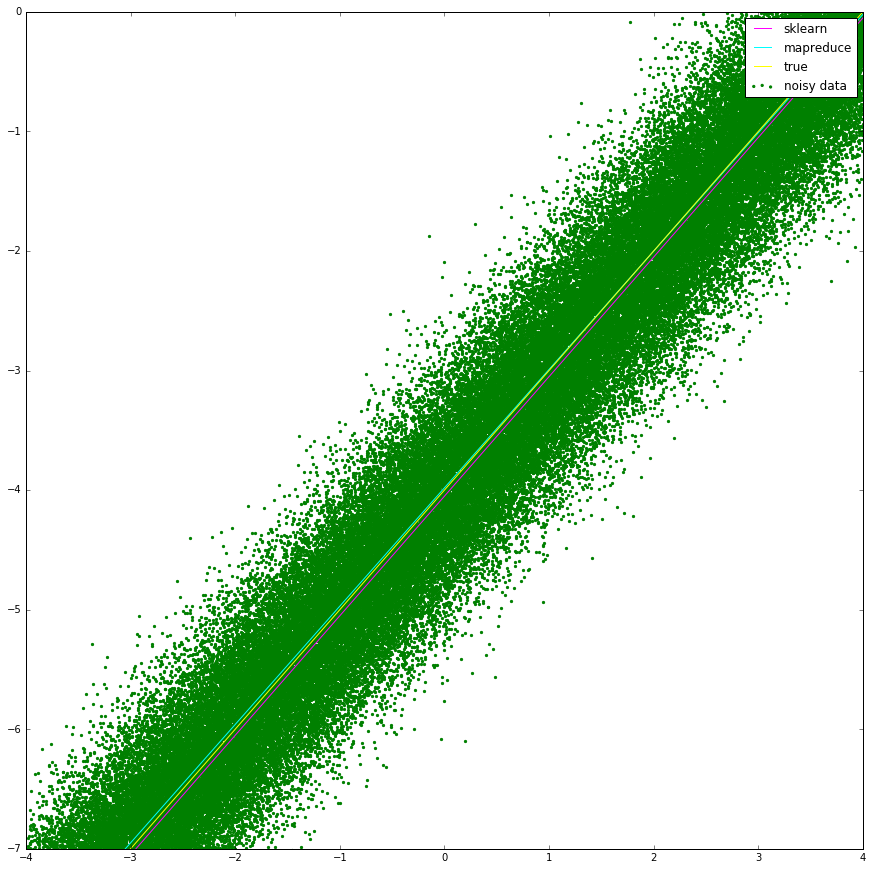

In [43]:
data=np.vstack((x.ravel(),y.ravel())).T
np.random.shuffle(data)
limit=int(x.shape[0]*0.1)
plt.figure(figsize=(15,15))
plt.scatter(x=data[:limit,0], y=data[:limit,1], label="noisy data", color='green', marker='.')
X=np.linspace(-4,4)[:,None]
y_lr=lr.predict(X)
plt.plot(X, y_lr, label="sklearn", color='magenta')
y_mr=0.98985417*X-3.98062542
plt.plot(X, y_mr, label="mapreduce", color='cyan')
plt.plot(X, X-4, label="true", color='yellow')
plt.legend()
plt.xlim((-4,4))
plt.ylim((-7,0))
plt.show()

### HW6.5.1 (Optional)
1. Using MRJob and in Python, plot the error surface for the weighted linear regression model using a heatmap and contour plot. 
2. Also plot the current model in the original domain space.  (Plot them side by side if possible)
3. Plot the path to convergence (during training) for the weighted linear regression model in plot error space and in the original domain space. Make sure to label your plots with iteration numbers, function, model space versus original domain space, etc.
4. Comment on convergence and on the mean squared error using your weighted OLS algorithm on the weighted dataset versus using the weighted OLS algorithm on the uniformly weighted dataset.

[-1.5550834   2.37024523] [ -1.5550834  -10.37024523] [ 3.5550834   2.37024523] [ 1 -4]


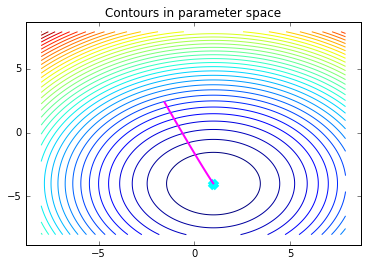

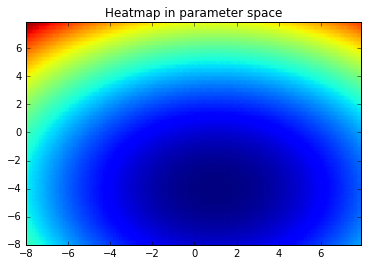

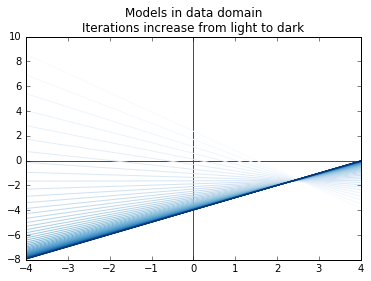

In [73]:
true_theta=np.array([1,-4])
initial=np.array([-1.5550834, 2.37024523])
delta=np.abs(initial-true_theta)
start=true_theta-delta
end=true_theta+delta
y,x=np.mgrid[slice(-8, 8, .1),
             slice(-8, 8, .1)]
loss=.5*((x-true_theta[0])**2+(y-true_theta[1])**2)
plt.Figure(figsize=(12,12))
plt.contour(x,y,loss,40)
data=np.array([
          [-1.55504834,  2.37024523],
          [-1.30013707,  1.70807783],
          [-1.07066068,  1.11474576],
          [-0.86408144,  0.58309324],
          [-0.67811479,  0.10670835],
          [-0.51070412, -0.32015428],
          [-0.35999798, -0.70264273],
          [-0.22432965, -1.04536992],
          [-0.10219872, -1.35246924],
          [ 0.00774556, -1.62764436],
          [ 0.10671914, -1.87421397],
          [ 0.19581668, -2.09515174],
          [ 0.27602358, -2.29312222],
          [ 0.34822697, -2.47051295],
          [ 0.41322544, -2.62946331],
          [ 0.4717379 , -2.77189023],
          [ 0.52441155, -2.89951141],
          [ 0.57182898, -3.01386596],
          [ 0.6145147, -3.116333 ],
          [ 0.65294083, -3.20814828],
          [ 0.68753243, -3.29041909],
          [ 0.71867211, -3.36413763],
          [ 0.74670434, -3.43019292],
          [ 0.77193919, -3.4893816 ],
          [ 0.79465579, -3.54241746],
          [ 0.81510545, -3.58994012],
          [ 0.83351438, -3.63252268],
          [ 0.85008621, -3.6706787 ],
          [ 0.86500426, -3.70486831],
          [ 0.87843357, -3.73550385],
          [ 0.8905227 , -3.76295477],
          [ 0.90140539, -3.78755211],
          [ 0.91120202, -3.80959252],
          [ 0.92002098, -3.82934179],
          [ 0.92795982, -3.8470381 ],
          [ 0.93510639, -3.86289485],
          [ 0.94153974, -3.87710327],
          [ 0.94733105, -3.88983471],
          [ 0.95254439, -3.9012427 ],
          [ 0.95723744, -3.91146482],
          [ 0.96146212, -3.92062434],
          [ 0.96526517, -3.92883172],
          [ 0.96868868, -3.93618594],
          [ 0.97177051, -3.94277569],
          [ 0.97454476, -3.94868043],
          [ 0.97704214, -3.95397137],
          [ 0.97929027, -3.95871231],
          [ 0.98131402, -3.96296043],
          [ 0.9831358 , -3.96676696],
          [ 0.98477575, -3.97017781],
          [ 0.98625203, -3.97323409],
          [ 0.98758097, -3.97597268],
          [ 0.98877727, -3.97842659],
          [ 0.98985417, -3.98062542],])
print initial, start, end, true_theta
plt.plot(data[:,0], data[:,1], linewidth=2, color='magenta',)
plt.scatter(true_theta[0], true_theta[1], linewidth=10, color='cyan',marker='x')
plt.title('Contours in parameter space')
plt.show()

plt.hexbin(x.ravel(),y.ravel(),C=loss.ravel(), cmap='jet')
plt.title('Heatmap in parameter space')
plt.show()

inp=np.linspace(-4,4)
plt.plot([0,0],[-8,10],c='red')
plt.plot([-4,4],[0,0],c='red')
for n,row in enumerate(data):
    plt.plot(inp, (row[0]*inp+row[1]), c=plt.cm.Blues(n*1.0/data.shape[0]), label=str(n))
plt.title("Models in data domain\nIterations increase from light to dark")
plt.show()


### HW6.6
Clean up notebook for GMM via EM

Using the following notebook as a starting point:

http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/0t7985e40fovlkw/EM-GMM-MapReduce%20Design%201.ipynb 

Improve this notebook as follows:
* Add in equations into the notebook (not images of equations) 
* Number the equations
* Make sure the equation notation matches the code and the code and comments refer to the equations numbers
* Comment the code
* Rename/Reorganize the code to make it more readable
* Rerun the examples similar graphics (or possibly better graphics)

See updates in [EM-GMM-MapReduce%20Design%201.ipynb](EM-GMM-MapReduce%20Design%201.ipynb)

### HW6.7
Implement Bernoulli Mixture Model via EM

Implement the EM clustering algorithm to determine Bernoulli Mixture Model for discrete data in MRJob.

As a unit test: use the same dataset from HW 4.5, the Tweet Dataset. 

1. Using this data, you will implement a 1000-dimensional EM-based Bernoulli Mixture Model  algorithm in MrJob on the users by their 1000-dimensional word stripes/vectors using K = 4.
2. Repeat this experiment using your KMeans MRJob implementation fron HW4.  
3. Report the rand index score using the class code as ground truth label for both algorithms and comment on your findings.

Here is some more information on the Tweet Dataset.

Here you will use a different dataset consisting of word-frequency distributions 
for 1,000 Twitter users. These Twitter users use language in very different ways,
and were classified by hand according to the criteria:

0. Human, where only basic human-human communication is observed.
1. Cyborg, where language is primarily borrowed from other sources (e.g., jobs listings, classifieds postings, advertisements, etc...).
2. Robot, where language is formulaically derived from unrelated sources (e.g., weather/seismology, police/fire event logs, etc...).
3. Spammer, where language is replicated to high multiplicity (e.g., celebrity obsessions, personal promotion, etc... )

Check out the preprints of  recent research,
which spawned this dataset:

http://arxiv.org/abs/1505.04342  
http://arxiv.org/abs/1508.01843

The main data lie in the accompanying file:

topUsers_Apr-Jul_2014_1000-words.txt

and are of the form:

```
USERID,CODE,TOTAL,WORD1_COUNT,WORD2_COUNT,...
.
.
```

where

```
USERID = unique user identifier
CODE = 0/1/2/3 class code
TOTAL = sum of the word counts
```

Using this data, you will implement a 1000-dimensional K-means algorithm in MrJob on the users
by their 1000-dimensional word stripes/vectors using several 
centroid initializations and values of K.

### HW6.8 (Optional)
1 Million songs

Predict the year of the song. Ask Jimi